In [1800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [1801]:
df = pd.read_csv("student_performance_dataset.csv")
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


Basic Data Analyses

In [1802]:
df.shape

(708, 10)

In [1803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [1804]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [1805]:
df.duplicated().sum()

np.int64(208)

In [1806]:
df.drop_duplicates(inplace=True)

In [1807]:
df.duplicated().sum()

np.int64(0)

In [1808]:
df.shape

(500, 10)

Eploratory Data Analyses - EDA

In [1809]:
df = df.drop('Student_ID', axis=1)

In [1810]:
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']

le_dict = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    le_dict[column] = le
    print(f"Label Mapping for {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}\n")

Label Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}

Label Mapping for Parental_Education_Level: {'Bachelors': np.int64(0), 'High School': np.int64(1), 'Masters': np.int64(2), 'PhD': np.int64(3)}

Label Mapping for Internet_Access_at_Home: {'No': np.int64(0), 'Yes': np.int64(1)}

Label Mapping for Extracurricular_Activities: {'No': np.int64(0), 'Yes': np.int64(1)}

Label Mapping for Pass_Fail: {'Fail': np.int64(0), 'Pass': np.int64(1)}



In [1811]:
categorical_cols = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Parental_Education_Level', 'Pass_Fail']
for col in categorical_cols:
    print(df[col].value_counts(), "\n")

Gender
0    256
1    244
Name: count, dtype: int64 

Internet_Access_at_Home
0    263
1    237
Name: count, dtype: int64 

Extracurricular_Activities
0    268
1    232
Name: count, dtype: int64 

Parental_Education_Level
1    135
0    127
3    121
2    117
Name: count, dtype: int64 

Pass_Fail
0    354
1    146
Name: count, dtype: int64 



Skewness of numerical columns:
 Study_Hours_per_Week   -0.128841
Attendance_Rate        -0.136345
Past_Exam_Scores        0.008730
Final_Exam_Score        0.747315
dtype: float64


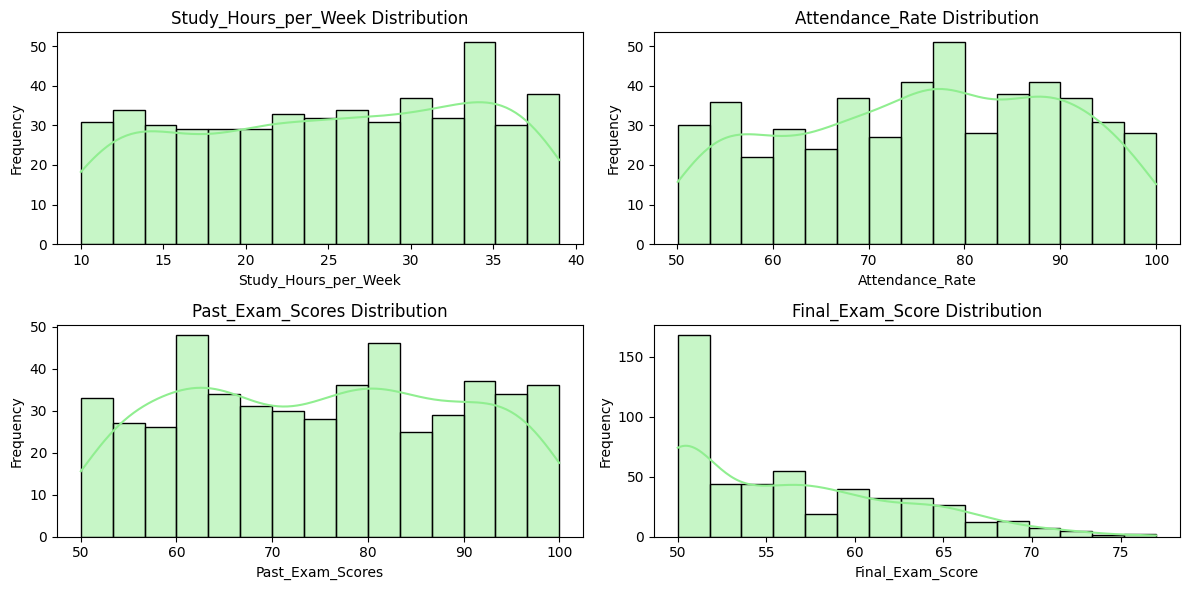

In [1812]:
numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']
skewness = df[numeric_cols].skew()
print("Skewness of numerical columns:\n", skewness)

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=15, kde=True, color='lightgreen', edgecolor='black')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [1813]:
df['Final_Exam_Score'] = np.log1p(df['Final_Exam_Score'])
print(df['Final_Exam_Score'].skew())

0.5863621003302218


In [1814]:
numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - {len(outliers)} outliers")

Study_Hours_per_Week - 0 outliers
Attendance_Rate - 0 outliers
Past_Exam_Scores - 0 outliers
Final_Exam_Score - 0 outliers


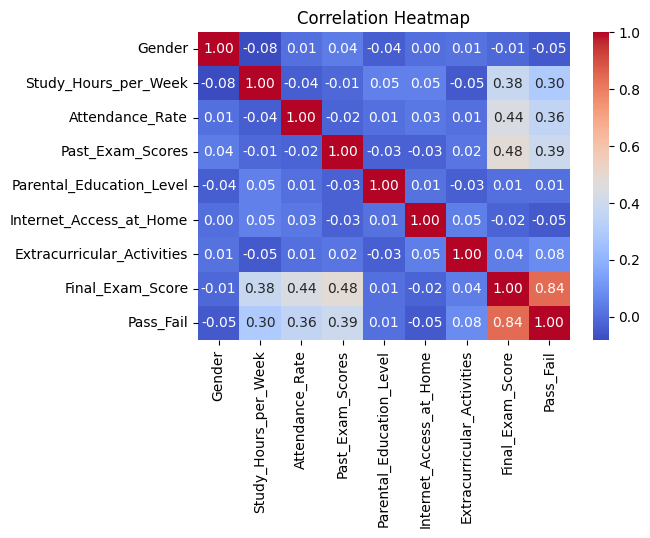

In [1815]:
all_cols = df.columns
corr_matrix = df[all_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Select features for modeling

In [1816]:
X = df.drop('Pass_Fail', axis=1)
y = df['Pass_Fail']

Train-test split

In [1817]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Random Forest

In [1818]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1819]:
y_pred_rf = rf.predict(X_test)

In [1820]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



[[75  0]
 [ 0 25]]


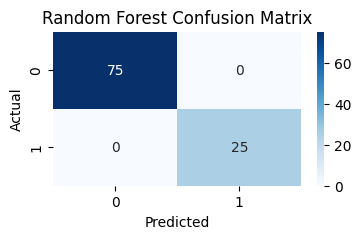

In [1821]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

plt.figure(figsize=(4,2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Train Naïve Bayes

In [1822]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [1823]:
y_pred_nb = nb.predict(X_test)

In [1824]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.98
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.96      0.96      0.96        25

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



[[74  1]
 [ 1 24]]


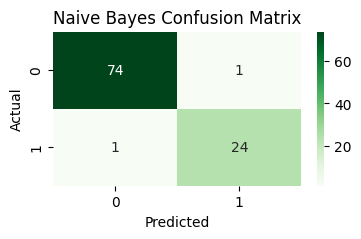

In [1825]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

plt.figure(figsize=(4,2))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Save the Random Forest model

In [1826]:
import pickle

# Save Random Forest model and label encoders
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump({
        'model': rf,
        'label_encoders': le_dict  # only if you want to save encoders
    }, f)

print("Random Forest model and label encoders saved successfully as 'random_forest_model.pkl'")


Random Forest model and label encoders saved successfully as 'random_forest_model.pkl'
